# Topic 2 DQ 2


Describe a scenario where the mean and median values of a dataset may differ significantly. What insights can be gained by examining this difference? Can you propose any solutions to handle this discrepancy? Additionally, how can Python be used to implement these solutions and what are some real-world examples of this phenomenon?




The mean and median values of a data set can differ significantly due to skewed data distribution which refers to a type of distribution in which the values or frequencies of data points are not evenly distributed around the mean. In a skewed distribution, the outliers in the tail pull the mean away from the center towards the longer tail. Skewed distributions are common in many real-world datasets. For example, the income distribution often has a right skew because there are relatively few individuals or households with extremely high incomes, which pushes the average upwards, while most people earn moderate incomes. 
Examining the difference between the mean and the median can provide insight into the distribution of the data set and the presence of outliers. If the mean is much higher or lower than the median, this indicates that the data set is skewed. Understanding this difference is crucial to making accurate data-driven interpretations and decisions.

- Identifying and Removing Outliers: Outliers can be identified using statistical methods such as z-scores or by visualizing the data using box plots. Once identified, outliers can be removed or adjusted accordingly.
- Remove a certain percentage of extreme values from the dataset before analysis to reduce the influence of outliers on the distribution.
- Transforming the Data: Transformations such as taking the logarithm or square root of the data can sometimes mitigate the effect of outliers and make the distribution more symmetric.
- Using Robust Statistics: Robust statistical measures such as the trimmed mean or Winsorized mean are less sensitive to outliers and provide more accurate estimates of central tendency.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# for this exercise I will study only the first 100 rows of the data frame 

In [3]:
#I select the first 100 rows of my data set 
df_100 = df.head(100)
df_100


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


In [51]:
#print summary statistics
df_100.ApplicantIncome.describe()

count      100.00000
mean      4122.83000
std       2258.89434
min       1000.00000
25%       2636.00000
50%       3598.00000
75%       4710.00000
max      12841.00000
Name: ApplicantIncome, dtype: float64

mean is different to medium

# let's find the reason for this difference

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

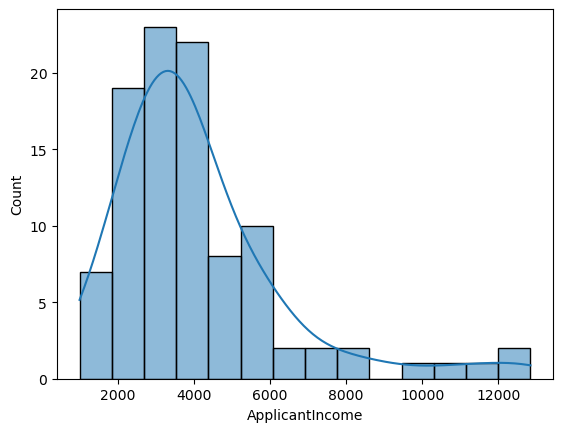

In [7]:
#I plot the histogram of the first 100 rows of the data set to check if it's Skewed 
sns.histplot(df_100.ApplicantIncome, kde=True)

note that this histogram is very skewed

<Axes: >

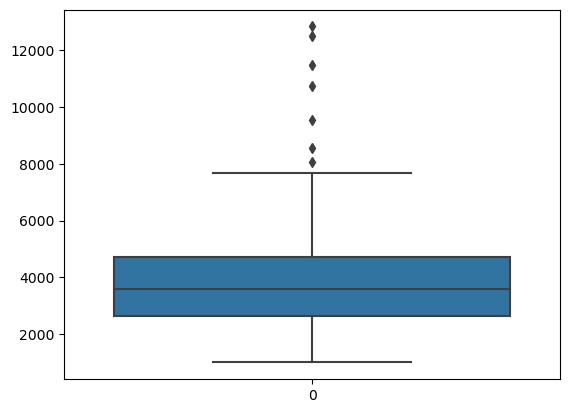

In [46]:
#I'm folding the boxplot to check whether this Skewed is due to the presence of the outliers.
sns.boxplot(df_100.ApplicantIncome)

We note that this skewness is due to the presence of the outliers.

# we will eliminate outliers with the z score method

In [23]:
df_100['zscore'] = ( df_100.ApplicantIncome - df_100.ApplicantIncome.mean() ) / df_100.ApplicantIncome.std()
df_100

C:\Users\ARMAND\AppData\Local\Temp\ipykernel_20144\4182564807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['zscore'] = ( df_100.ApplicantIncome - df_100.ApplicantIncome.mean() ) / df_100.ApplicantIncome.std()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1.177200
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,-0.949947
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y,0.028850


# we first choose the maximum threshold 3



In [24]:
#Get data points that has z score higher than 3 or lower than -3.
df_100[(df_100.zscore<-3) | (df_100.zscore>3)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,3.859486
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,3.708527
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,3.265832


In [25]:
#Remove the outliers and produce new dataframe
df_no_outliers = df_100[(df_100.zscore>-3) & (df_100.zscore<3)]
df_no_outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1.177200
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,-0.949947
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y,0.028850


<Axes: >

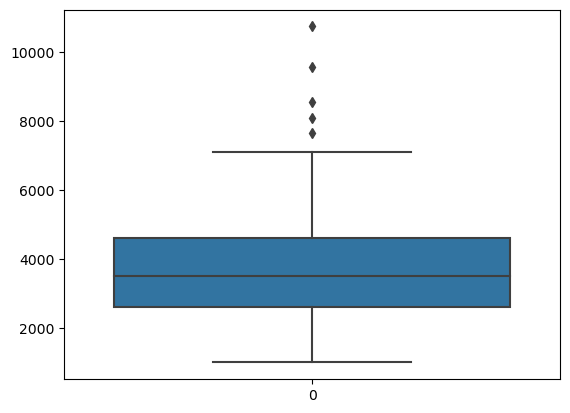

In [26]:
#plot the boxplot to check if all outliers have been removed
sns.boxplot(df_no_outliers.ApplicantIncome)

we notice that not all outliers have been removed

# we reduce the threshold to 0.9

In [42]:
#Remove the outliers and produce new dataframe for z score higher than 0.9 or lower than -0.9.
df_no_outliers = df_100[(df_100.zscore>-0.9) & (df_100.zscore<0.9)]
df_no_outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y,-0.376215
93,LP001322,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban,Y,0.004502
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y,-0.222600
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501


<Axes: >

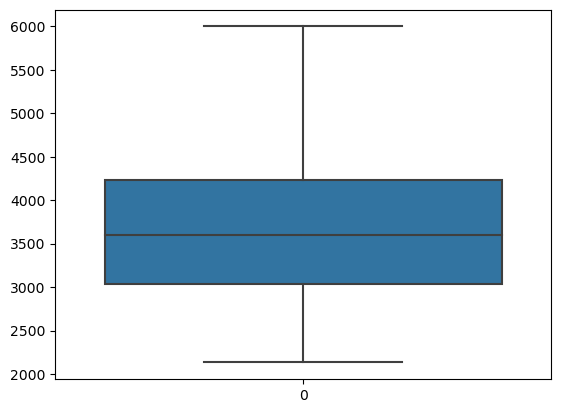

In [43]:
##plot the boxplot to check if all outliers have been removed
sns.boxplot(df_no_outliers.ApplicantIncome)

we notice that all outliers have been removed

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

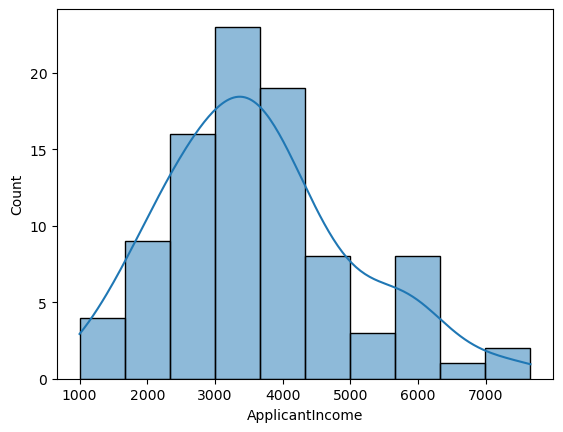

In [44]:
#plot the histogram to check for symmetry
sns.histplot(df_no_outlier.ApplicantIncome, kde=True)

histogram is slightly symmetrical

In [45]:
df_no_outlier.ApplicantIncome.describe()

count      93.000000
mean     3639.634409
std      1375.069372
min      1000.000000
25%      2600.000000
50%      3500.000000
75%      4230.000000
max      7660.000000
Name: ApplicantIncome, dtype: float64

In [47]:
df_no_outlier.ApplicantIncome.median()

3500.0

In [48]:
df_no_outlier.ApplicantIncome.mean()

3639.6344086021504